In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Overview of data
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Dropping the useless columns
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Checking for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
#As we can see, none of the columns above have any null values

In [6]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
# Describing basic statistics of the numerical columns
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#Dropping dimensionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [9]:
#We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

Text(0.5, 1.0, 'Correlation matrics')

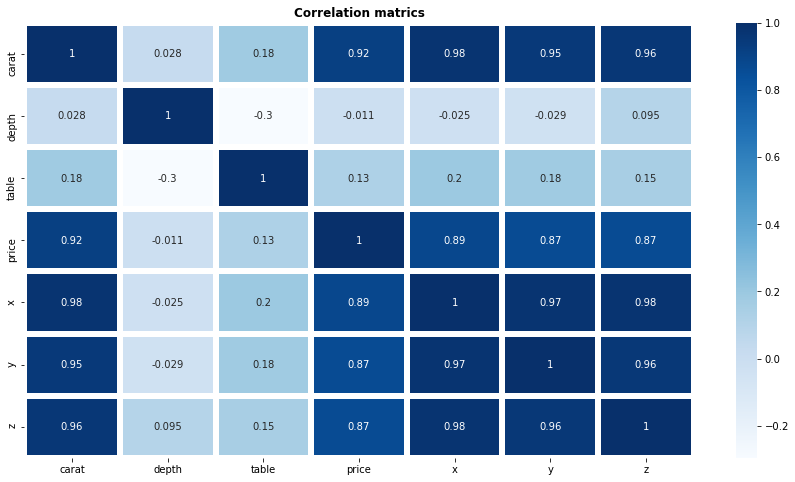

In [10]:
# Plotting Correlation matrix
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths = 5, cmap='Blues', annot=True)
plt.title("Correlation matrics", weight='bold')

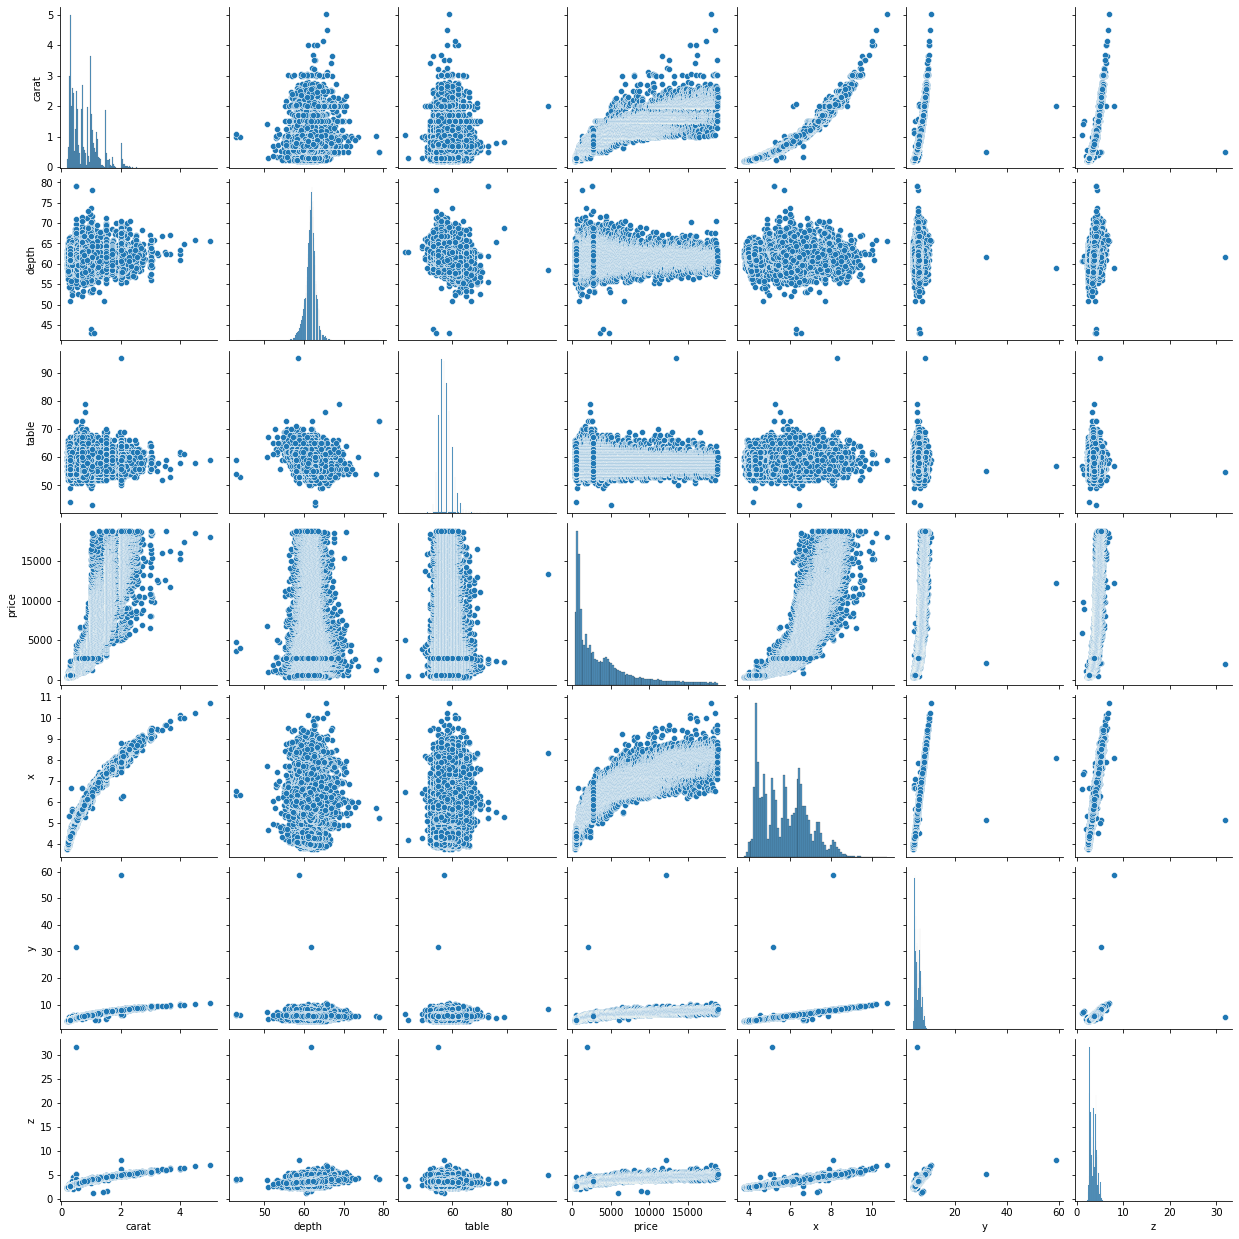

In [11]:
# PairPlot
sns.pairplot(df)

findfont: Font family ['Sherif'] not found. Falling back to DejaVu Sans.


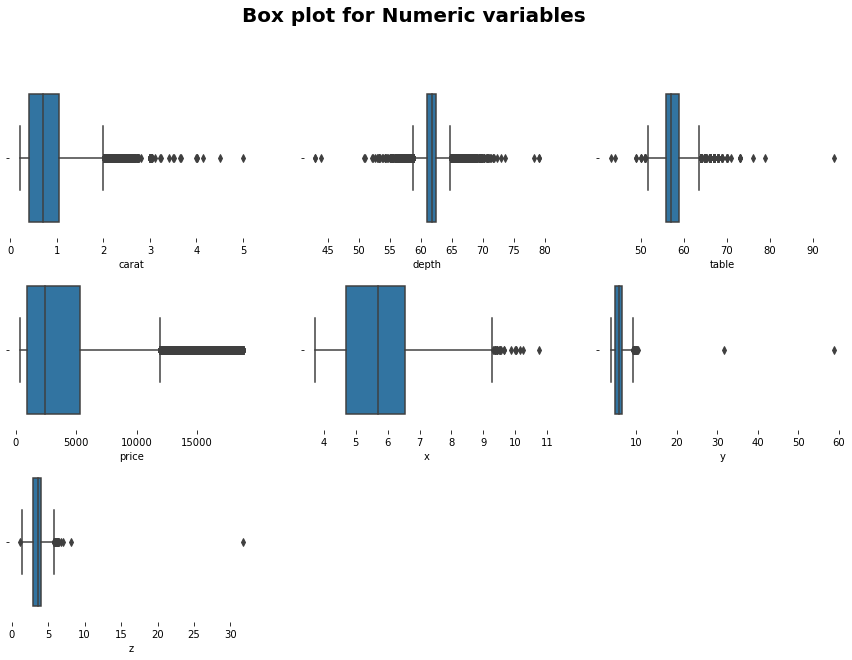

In [12]:
# Box plot for the numerical values
int_cols = df.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot for Numeric variables", family='Sherif', size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df, x=i)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

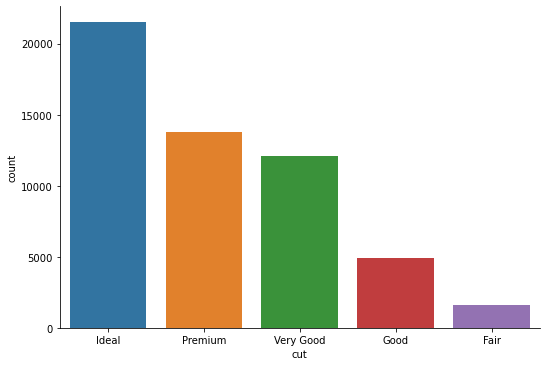

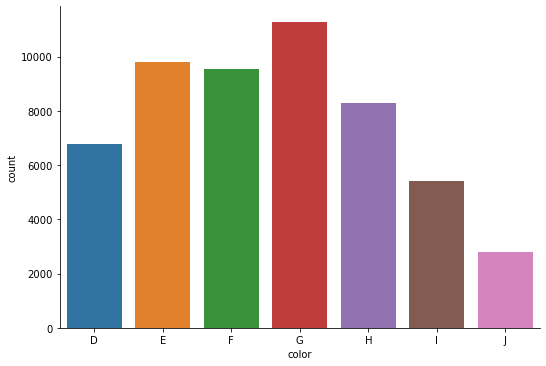

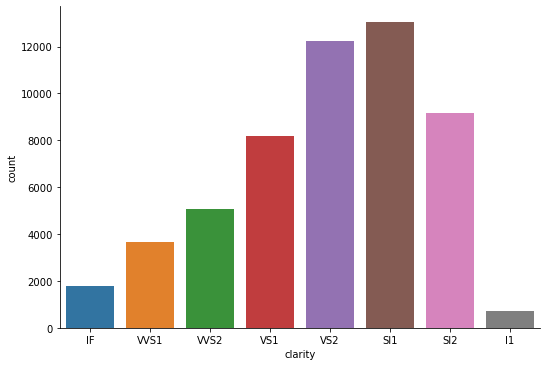

In [13]:
# Plotting the categorical features

plot = sns.catplot(x = 'cut', data = df, kind = 'count', aspect = 1.5, order = ['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'])
plot = sns.catplot(x = 'color', data = df, kind = 'count', aspect = 1.5, order = ['D','E','F','G','H','I','J'])
plot = sns.catplot(x = 'clarity', data = df, kind = 'count', aspect = 1.5, order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

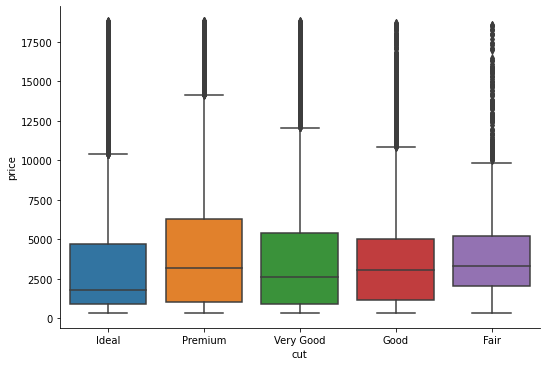

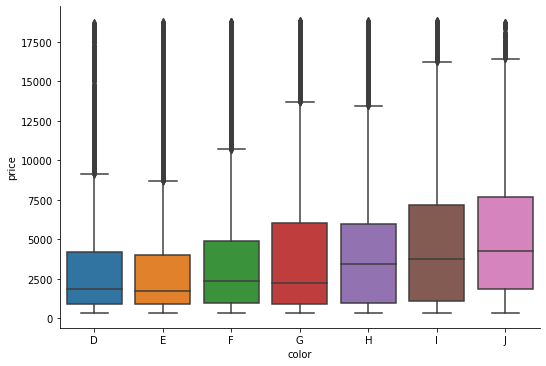

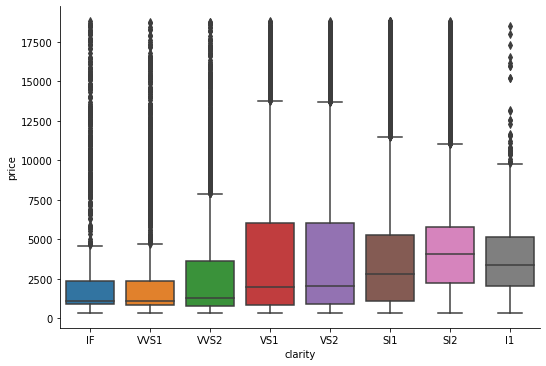

In [14]:
plot = sns.catplot(x='cut', y='price', data = df, kind ='box' , aspect = 1.5, order = ['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'])
plot = sns.catplot(x='color', y='price', data = df, kind ='box' , aspect = 1.5, order = ['D','E','F','G','H','I','J'])
plot = sns.catplot(x='clarity', y='price', data = df, kind ='box' , aspect = 1.5, order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

In [15]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        
        IQR = Q3 - Q1
        
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [16]:
# Locating the outliers
df.loc[detect_outliers(df,['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])]

,carat,cut,color,clarity,depth,table,price,x,y,z
13992,2.01,Fair,I,I1,55.9,64.0,5696,8.48,8.39,4.71
17196,2.72,Fair,J,I1,68.2,56.0,6870,8.46,8.43,5.76
18067,2.01,Fair,F,I1,58.7,66.0,7294,8.30,8.19,4.84
19346,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
...,...,...,...,...,...,...,...,...,...,...
24605,1.98,Fair,H,VS1,58.3,69.0,12923,8.28,8.17,4.80
24787,1.50,Good,F,VS2,58.6,64.0,13160,7.52,7.46,4.39
24891,2.00,Good,E,SI2,57.3,65.0,13320,8.26,8.22,4.72
26773,1.51,Very Good,F,VVS2,58.0,65.0,16613,7.58,7.62,4.41


In [17]:
# Dropping the outliers
df = df.drop(detect_outliers(df,['carat', 'depth', 'table', 'x', 'y', 'z', 'price']),axis = 0).reset_index(drop = True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53743,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53744,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53745,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53746,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
# Selecting the categorical features
df.select_dtypes(include='O')

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53743,Ideal,D,SI1
53744,Good,D,SI1
53745,Very Good,D,SI1
53746,Premium,H,SI2


In [19]:
# OHE on the categorical features
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df2=pd.DataFrame(ohe.fit_transform(df[['cut','color','clarity']]).toarray())
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53743,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53744,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53745,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53746,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# combining the dataframe
df_ohe=pd.concat([df,df2],axis=1)
df_ohe

,carat,cut,color,clarity,depth,table,price,x,y,z,...,10,11,12,13,14,15,16,17,18,19
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53743,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53744,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53745,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53746,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
# Dropping the original categorical columns
df_ohe=df_ohe.drop(['cut','color','clarity'],axis=1)
df_ohe

,carat,depth,table,price,x,y,z,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53743,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53744,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53745,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53746,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
# Trying the get_dummies method for encoding
df3=pd.get_dummies(df[['cut','color','clarity']])
df3

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53743,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53744,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53745,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53746,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [23]:
# adding to original df
df_dummies=pd.concat([df,df3],axis=1)
df_dummies

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53743,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,1,0,0,0,0,0
53744,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,1,0,0,0,0,0
53745,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,1,0,0,0,0,0
53746,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# Dropping original categorical features
df_dummies=df_dummies.drop(['cut','color','clarity'],axis=1)
df_dummies

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53743,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53744,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53745,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53746,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Baseline analysis
x = df.drop(['price','cut','color','clarity'],axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


models = [linear_model.LinearRegression(),RandomForestRegressor(),linear_model.Lasso(),linear_model.Ridge()]

for m in models:
    m.fit(train_x,train_y)
    score = m.score(test_x,test_y)
    print("Model:",m,"Score:",score)

Model: LinearRegression() Score: 0.8232688252794519
Model: RandomForestRegressor() Score: 0.8815019084845618
Model: Lasso() Score: 0.8483817499975131
Model: Ridge() Score: 0.8256927806076132


C:\Users\shem_pereira\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5151213778.592453, tolerance: 58996817.237412505
  model = cd_fast.enet_coordinate_descent(


In [26]:
# After Scaling the data
x = df.drop(['price','cut','color','clarity'],axis=1)
y = df['price']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_cols = x.columns.to_list()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x_cols)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y,random_state = 2,test_size=0.3)

for m in models:
    m.fit(train_x,train_y)
    score = m.score(test_x,test_y)
    print("Model:",m,"Score:",score)

Model: LinearRegression() Score: 0.8232688252794522
Model: RandomForestRegressor() Score: 0.8810386477178405
Model: Lasso() Score: 0.8441026822914027
Model: Ridge() Score: 0.8248891060980252


C:\Users\shem_pereira\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4193710490.6263885, tolerance: 58996817.237412505
  model = cd_fast.enet_coordinate_descent(


In [27]:
# As we can see, there is not much improvement in the accuracy after scaling the data

Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (53748, 10)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further proces

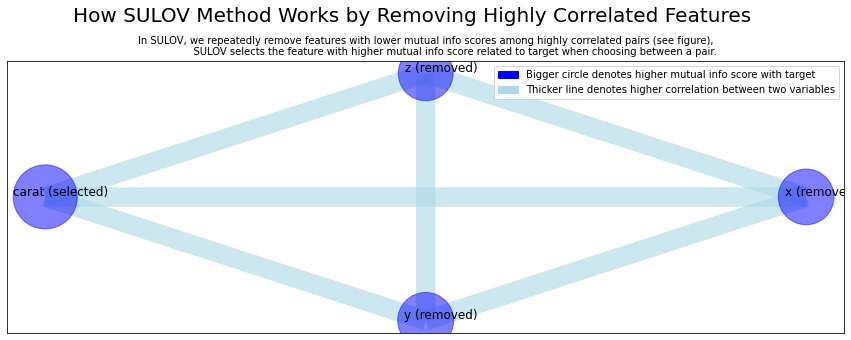

    Adding 3 categorical variables to reduced numeric variables  of 3
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 6 
    Finding Important Features using Boosted Trees algorithm...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Selected 6 important features from your dataset
    Time taken (in seconds) = 9
Returning list of 6 important features and dataframe.


In [28]:
# Trying out feature selection 
from featurewiz import featurewiz
features , train = featurewiz(df,target='price')

In [29]:
# Testing the accuracy after feature selection using Featurewiz
x = train.drop('price',axis=1)
y=train['price']
x_scaled = StandardScaler().fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns.to_list())

train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

for m in models:
    m.fit(train_x,train_y)
    score = m.score(test_x,test_y)
    print("Model:",m,"Score:",score)

Model: LinearRegression() Score: 0.8833812300985822
Model: RandomForestRegressor() Score: 0.9809917805575747
Model: Lasso() Score: 0.8833824134644281
Model: Ridge() Score: 0.8833817160318744


In [30]:
# As we can see, there is a significant improvement in the accuracy

In [31]:
# Comparing RandomForest Models of different Depths
RandomForestModels = [RandomForestRegressor(max_depth=2,n_jobs=-1),RandomForestRegressor(max_depth=5,n_jobs=-1),
                      RandomForestRegressor(max_depth=7,n_jobs=-1),RandomForestRegressor(max_depth=10,n_jobs=-1),
                      RandomForestRegressor(max_depth=15,n_jobs=-1),RandomForestRegressor(max_depth=20,n_jobs=-1)]

for m in RandomForestModels:
    m.fit(train_x,train_y)
    score = m.score(train_x,train_y)
    print("Model:",m,"Score:",score)

Model: RandomForestRegressor(max_depth=2, n_jobs=-1) Score: 0.8245224993169604
Model: RandomForestRegressor(max_depth=5, n_jobs=-1) Score: 0.9368160838667273
Model: RandomForestRegressor(max_depth=7, n_jobs=-1) Score: 0.968040238949204
Model: RandomForestRegressor(max_depth=10, n_jobs=-1) Score: 0.9835499283319638
Model: RandomForestRegressor(max_depth=15, n_jobs=-1) Score: 0.9936342889763841
Model: RandomForestRegressor(max_depth=20, n_jobs=-1) Score: 0.9968104636919082


In [32]:
# As we increase the depth, the accuracy increases, but only till a certain point after which it converges

In [33]:
# Comparing RandomForest Models with different no of estimators
RandomForestModels = [RandomForestRegressor(n_estimators=3,n_jobs=-1),
                      RandomForestRegressor(n_estimators=5,n_jobs=-1),
                      RandomForestRegressor(n_estimators=10,n_jobs=-1),
                      RandomForestRegressor(n_estimators=50,n_jobs=-1),
                      RandomForestRegressor(n_estimators=200,n_jobs=-1),
                        RandomForestRegressor(n_estimators=300,n_jobs=-1)]

for m in RandomForestModels:
    m.fit(train_x,train_y)
    score = m.score(train_x,train_y)
    print("Model:",m,"Score:",score)

Model: RandomForestRegressor(n_estimators=3, n_jobs=-1) Score: 0.9935024396596237
Model: RandomForestRegressor(n_estimators=5, n_jobs=-1) Score: 0.9948960699619868
Model: RandomForestRegressor(n_estimators=10, n_jobs=-1) Score: 0.9961868131353755
Model: RandomForestRegressor(n_estimators=50, n_jobs=-1) Score: 0.9969561883990048
Model: RandomForestRegressor(n_estimators=200, n_jobs=-1) Score: 0.9971657855685098
Model: RandomForestRegressor(n_estimators=300, n_jobs=-1) Score: 0.997181990386595


In [34]:
# As we increase the number of estimators, the accuracy increases. However it converges beyong a certain point.